S NAVIN SUNDER ; BL.EN.U4CSE21176 ; CSE - C

In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split  
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [3]:
data = pd.read_excel(r"C:\Amrita cse\5th Semester\Machine Learning\Lab\Lab 4\embeddingsdata.xlsx")
df = pd.DataFrame(data)
df

,embed_0,embed_1,embed_2,embed_3,embed_4,embed_5,embed_6,embed_7,embed_8,embed_9,...,embed_759,embed_760,embed_761,embed_762,embed_763,embed_764,embed_765,embed_766,embed_767,Label
0,0.009625,-0.029216,0.027109,0.023631,-0.004972,0.031757,-0.045125,0.044483,0.019400,-0.017189,...,-0.001972,-0.008154,-0.056139,0.009890,0.042366,0.040134,0.009304,-0.016137,-0.009309,0
1,-0.007535,-0.039844,0.030167,0.031224,0.004742,0.028289,-0.068723,0.039153,0.019596,-0.027138,...,0.008613,-0.006578,-0.034220,0.027574,0.045456,0.027402,0.017837,-0.035009,-0.010062,0
2,0.022408,-0.030840,0.032328,0.046965,0.007798,0.025860,-0.065093,0.035118,0.035359,-0.029205,...,0.020413,-0.034288,-0.050649,0.028408,0.040412,0.030261,0.003535,-0.034122,-0.017289,0
3,0.019677,-0.034055,0.012662,0.070387,-0.011170,0.017842,-0.050945,0.044878,0.034781,-0.025772,...,0.002963,-0.018754,-0.053278,0.033005,0.031635,0.022544,-0.011774,-0.011125,-0.017540,0
4,0.017678,-0.030323,0.012829,0.065267,-0.025161,0.011964,-0.050590,0.042820,0.029161,-0.015004,...,0.010192,-0.010147,-0.035857,0.021784,0.034621,0.017342,-0.009884,-0.010316,-0.029238,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,0.019743,-0.071799,0.022546,0.049042,-0.005767,-0.016275,-0.037731,0.029718,0.009203,-0.030913,...,-0.001192,-0.026138,-0.056447,0.015818,0.045241,0.012620,-0.004837,-0.014540,-0.046791,2
896,0.000186,-0.027604,0.010623,0.038237,-0.026675,0.020215,-0.040816,0.032210,0.041016,-0.014836,...,0.015479,-0.003967,-0.037808,0.021234,0.031012,-0.010890,0.003081,-0.015145,-0.045444,0
897,0.018066,-0.032152,0.039794,0.047608,0.003898,0.024092,-0.056508,0.020527,0.031972,-0.026038,...,0.011308,-0.016882,-0.059904,0.009558,0.039976,0.029574,0.013737,-0.003724,-0.017324,2
898,-0.003492,-0.022739,0.021777,0.044054,-0.005621,0.013863,-0.079196,0.039150,0.004557,-0.015787,...,0.004005,-0.007196,-0.041652,0.020945,0.047604,0.019767,0.005806,-0.019280,-0.016415,5


A1. Merge your train & test sets and remove the class labels. Use k-means algorithm with k = 3 or 5 (based on your dataset) to form the clusters.

In [7]:
# it is not preferred to merge the train and test sets of the dataset as it avoids the performance of the model based on unseen data. Also result in data leakage, overfittng, etc.
# removing the class label from the dataset will make it an unnsupervised model to work with.

X = data.iloc[:, :-1]  #Features
y = data.iloc[:, -1]    #target data  

# to obtain train and test set with features X and labels y
XTrain, Xtest, yTrain, yTest = train_test_split(X, y, test_size= 0.2, random_state = 42)

# to merge the train and test set by concatenating X and y separately
mergedX = pd.concat([XTrain, Xtest], axis = 0)
mergedy = pd.concat([yTrain, yTest], axis = 0)

mergedData = pd.DataFrame(data=np.c_[mergedX, mergedy], columns=list(X.columns) + ['label'])    #to obtain the 2-D array where mergedX becomes the first of columns and mergedy becomes the last column

# reset the index of the merged DataFrame
mergedData.reset_index(drop=True, inplace=True)

# Display the merged dataset
print(mergedData.head())


    embed_0   embed_1   embed_2   embed_3   embed_4   embed_5   embed_6  \
0 -0.006776 -0.030313  0.026364  0.025784 -0.000306  0.019891 -0.071866   
1  0.023304 -0.041007  0.008178  0.036862 -0.001802  0.020734 -0.049504   
2  0.006877 -0.029370  0.036910  0.047952 -0.005241  0.015871 -0.064143   
3  0.011828 -0.033479  0.012525  0.038121 -0.014333  0.010093 -0.073395   
4  0.000212 -0.028874  0.026162  0.029681  0.008708  0.013785 -0.068606   

    embed_7   embed_8   embed_9  ...  embed_759  embed_760  embed_761  \
0  0.038008  0.024533 -0.026641  ...  -0.013877  -0.014510  -0.046100   
1  0.039014  0.041787 -0.018391  ...   0.009059  -0.023725  -0.050698   
2  0.043218  0.037472 -0.017618  ...   0.016045  -0.033840  -0.040192   
3  0.016570  0.032675 -0.028541  ...   0.001953  -0.021908  -0.024885   
4  0.042262  0.029152 -0.027494  ...  -0.001227  -0.008715  -0.060270   

   embed_762  embed_763  embed_764  embed_765  embed_766  embed_767  label  
0   0.017894   0.045380   0.01850

In [8]:
# to remove the class label 

mergedDataWithoutLabels = mergedData.drop('label' , axis = 1)

print(mergedDataWithoutLabels.head())

    embed_0   embed_1   embed_2   embed_3   embed_4   embed_5   embed_6  \
0 -0.006776 -0.030313  0.026364  0.025784 -0.000306  0.019891 -0.071866   
1  0.023304 -0.041007  0.008178  0.036862 -0.001802  0.020734 -0.049504   
2  0.006877 -0.029370  0.036910  0.047952 -0.005241  0.015871 -0.064143   
3  0.011828 -0.033479  0.012525  0.038121 -0.014333  0.010093 -0.073395   
4  0.000212 -0.028874  0.026162  0.029681  0.008708  0.013785 -0.068606   

    embed_7   embed_8   embed_9  ...  embed_758  embed_759  embed_760  \
0  0.038008  0.024533 -0.026641  ...  -0.053615  -0.013877  -0.014510   
1  0.039014  0.041787 -0.018391  ...  -0.016817   0.009059  -0.023725   
2  0.043218  0.037472 -0.017618  ...  -0.021264   0.016045  -0.033840   
3  0.016570  0.032675 -0.028541  ...  -0.031825   0.001953  -0.021908   
4  0.042262  0.029152 -0.027494  ...  -0.040174  -0.001227  -0.008715   

   embed_761  embed_762  embed_763  embed_764  embed_765  embed_766  embed_767  
0  -0.046100   0.017894   0.0

In [10]:
# for K - means clustering the dataset with no label to be used as this is an unsupervised model

# K - Means model with k=3
kMeans = KMeans(n_clusters=3, random_state=42)  # smaller value of K to create small clusters with larger number of clusters. This leads to over-generation. 
                                                # when K is large, the algorithm produces a higher number of smaller clusters. This can lead to under-generalization.
                                                # in over-generation distinct patterns or groups within the data aren't identified.
                                                # under-generalization the algorithm identifies granular clusters that may not reflect the underlying structure of the data.
# Fit the model to your data
kMeans.fit(mergedDataWithoutLabels)

# Get the cluster labels for each data point
clusterLabels = kMeans.labels_

# Add the cluster labels to the DataFrame
df_clusters = mergedDataWithoutLabels.copy()
df_clusters['Cluster'] = clusterLabels

# Display the DataFrame with cluster labels
print(df_clusters.head())

c:\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


    embed_0   embed_1   embed_2   embed_3   embed_4   embed_5   embed_6  \
0 -0.006776 -0.030313  0.026364  0.025784 -0.000306  0.019891 -0.071866   
1  0.023304 -0.041007  0.008178  0.036862 -0.001802  0.020734 -0.049504   
2  0.006877 -0.029370  0.036910  0.047952 -0.005241  0.015871 -0.064143   
3  0.011828 -0.033479  0.012525  0.038121 -0.014333  0.010093 -0.073395   
4  0.000212 -0.028874  0.026162  0.029681  0.008708  0.013785 -0.068606   

    embed_7   embed_8   embed_9  ...  embed_759  embed_760  embed_761  \
0  0.038008  0.024533 -0.026641  ...  -0.013877  -0.014510  -0.046100   
1  0.039014  0.041787 -0.018391  ...   0.009059  -0.023725  -0.050698   
2  0.043218  0.037472 -0.017618  ...   0.016045  -0.033840  -0.040192   
3  0.016570  0.032675 -0.028541  ...   0.001953  -0.021908  -0.024885   
4  0.042262  0.029152 -0.027494  ...  -0.001227  -0.008715  -0.060270   

   embed_762  embed_763  embed_764  embed_765  embed_766  embed_767  Cluster  
0   0.017894   0.045380   0.018

In [15]:
# K - Means model with k=5
kMeans = KMeans(n_clusters=5, random_state=42)

# Fit the model to your data
kMeans.fit(mergedDataWithoutLabels)

# Get the cluster labels for each data point
clusterLabels = kMeans.labels_

# Add the cluster labels to the DataFrame
df_clusters = mergedDataWithoutLabels.copy()
df_clusters['Cluster'] = clusterLabels

# Display the DataFrame with cluster labels
print(df_clusters.head())

c:\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


    embed_0   embed_1   embed_2   embed_3   embed_4   embed_5   embed_6  \
0 -0.006776 -0.030313  0.026364  0.025784 -0.000306  0.019891 -0.071866   
1  0.023304 -0.041007  0.008178  0.036862 -0.001802  0.020734 -0.049504   
2  0.006877 -0.029370  0.036910  0.047952 -0.005241  0.015871 -0.064143   
3  0.011828 -0.033479  0.012525  0.038121 -0.014333  0.010093 -0.073395   
4  0.000212 -0.028874  0.026162  0.029681  0.008708  0.013785 -0.068606   

    embed_7   embed_8   embed_9  ...  embed_759  embed_760  embed_761  \
0  0.038008  0.024533 -0.026641  ...  -0.013877  -0.014510  -0.046100   
1  0.039014  0.041787 -0.018391  ...   0.009059  -0.023725  -0.050698   
2  0.043218  0.037472 -0.017618  ...   0.016045  -0.033840  -0.040192   
3  0.016570  0.032675 -0.028541  ...   0.001953  -0.021908  -0.024885   
4  0.042262  0.029152 -0.027494  ...  -0.001227  -0.008715  -0.060270   

   embed_762  embed_763  embed_764  embed_765  embed_766  embed_767  Cluster  
0   0.017894   0.045380   0.018

A2. Determine the ideal k value for your dataset. Determine the clusters for a range of k ε[1,31]. Use elbow method to determine the ideal value of k based on average Euclidean distance from cluster center. 

c:\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly

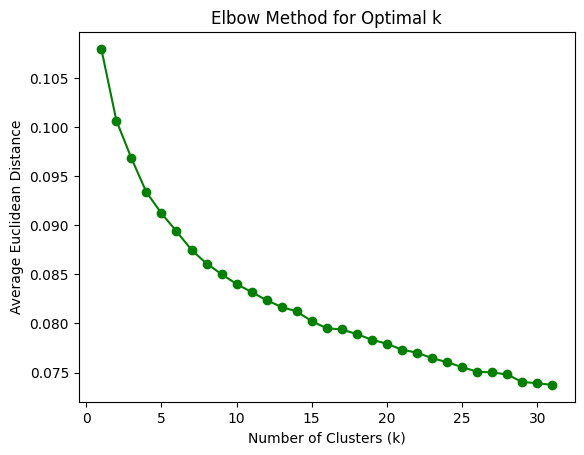

In [19]:
# Elbow method is used to find the optimal k value for a given cluster. The value of k choosen should be such that the distances when measured shouldn't be very large.
# The distances can be calculated in many different ways that includes euclidean and WCSS.
# On plotting the graph for various values of k the point on graph where the elbow or the curve noticed will be the required value of k to be choosen.

# Define a range of k values
kValues = list(range(1, 32))

# Calculate the average Euclidean distance for each k
averageDistances = []

for k in kValues:
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(mergedDataWithoutLabels)
    # "kmeans.inertia_" performs the sum of squared of distances(euclidean distance) and when divided by the length of "mergedDataWithoutLabels" the average distance can be obtained
    averageDistances.append(kmeans.inertia_ / len(mergedDataWithoutLabels))

# Plot the elbow curve
plt.plot(kValues, averageDistances, marker='o', color='green')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Euclidean Distance')
plt.show()

A3. Use Agglomerative Clustering for hierarchical clustering of your data. Plot the dendrogram to visualize the clusters.

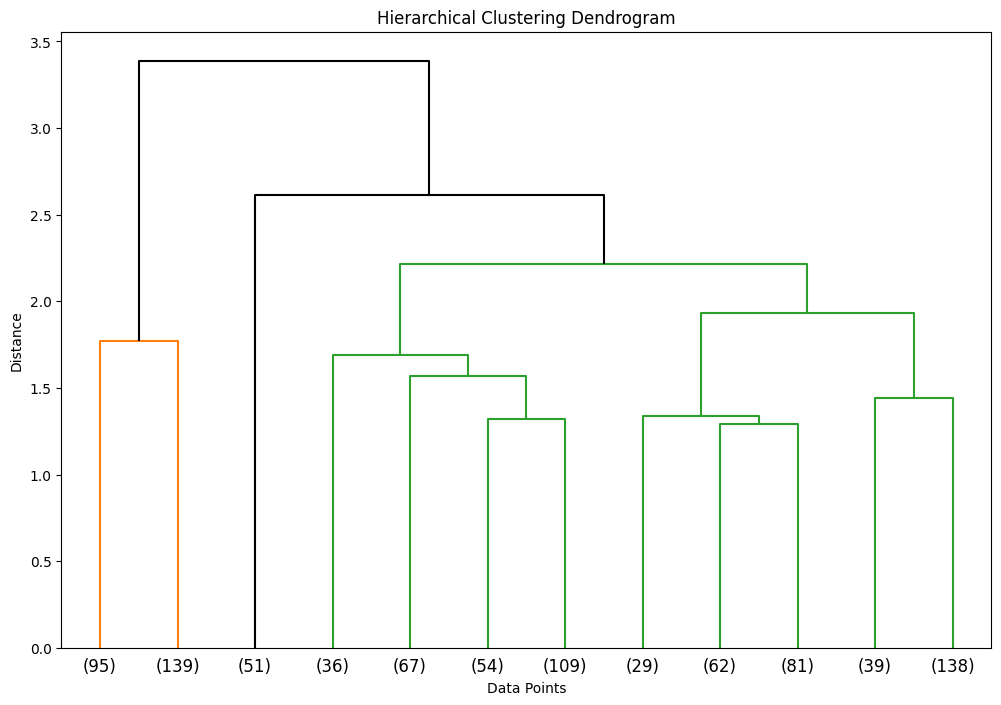

In [20]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Agglomerative Clustering aka hierarchical clustering that follows bottom-up approach
# distance_threshold to specify a threshold at which the merging stops
# n_clusters = none to ensure that the clustering is not based on numbers
# linkage = ward to specify that hierarchical clustering to measure the distances between the clusters
agg_cluster = AgglomerativeClustering(n_clusters=None, distance_threshold=0, linkage='ward')    # to form clusters
agg_labels = agg_cluster.fit_predict(mergedDataWithoutLabels)   # to train the model using .fit

# Create linkage matrix for the dendrogram
linkage_matrix = linkage(mergedDataWithoutLabels, method='ward', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, color_threshold=None, above_threshold_color='k', truncate_mode='lastp', p=12)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()


A4. Perform sequential feature selection algorithms for arriving at the optimal number of features needed for your dataset.